## Copy Raw data from .csv to PostgresBD

In [15]:
#!pwd

In [1]:
import pandas as pd

file_path="us_retail_sales.csv"

#pd.read_csv("us_retail_sales.csv", sep=',')
df = pd.read_csv(file_path, sep=';')
df.head()

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,441,Motor vehicle and parts dealers,NaN,29811.0
1,01/01/1992,4411,Automobile dealers,NaN,25800.0
2,01/01/1992,"4411, 4412",Automobile and other motor vehicle dealers,NaN,26788.0
3,01/01/1992,44111,New car dealers,NaN,24056.0
4,01/01/1992,44112,Used car dealers,NaN,1744.0


In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Step 2: Create a connection to an SQLite database (or another database)
engine = create_engine('sqlite:///us_retail_sales_v2.db')  # SQLite database

# Step 3: Write the DataFrame to a table in the database
df.to_sql('us_retail_sales', con=engine, if_exists='replace', index=False)

# Step 4: Verify the data by querying it
query_result = pd.read_sql('SELECT * FROM us_retail_sales LIMIT 5;', con=engine)
display(query_result)

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,441,Motor vehicle and parts dealers,None,29811.0
1,01/01/1992,4411,Automobile dealers,None,25800.0
2,01/01/1992,"4411, 4412",Automobile and other motor vehicle dealers,None,26788.0
3,01/01/1992,44111,New car dealers,None,24056.0
4,01/01/1992,44112,Used car dealers,None,1744.0


In [5]:
# Step 2: Set up connection parameters for PostgreSQL
pg_user = "postgres"        # Replace with your PostgreSQL username
pg_password = "admin"    # Replace with your PostgreSQL password
pg_host = "localhost"            # Or your database host
pg_port = "5432"                 # Default PostgreSQL port
# pg_dbname = "postgres"      # Replace with your PostgreSQL database name
pg_dbname = "sql_book_db"     


# Step 3: Create a connection to the PostgreSQL database
engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_dbname}")

# Step 4: Write the DataFrame to a PostgreSQL table
df.to_sql('us_retail_sales', con=engine, if_exists='replace', index=False)

# Step 5: Verify by reading back from the database
query_result = pd.read_sql('SELECT * FROM us_retail_sales LIMIT 5;', con=engine)
display(query_result)

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,441,Motor vehicle and parts dealers,None,29811.0
1,01/01/1992,4411,Automobile dealers,None,25800.0
2,01/01/1992,"4411, 4412",Automobile and other motor vehicle dealers,None,26788.0
3,01/01/1992,44111,New car dealers,None,24056.0
4,01/01/1992,44112,Used car dealers,None,1744.0


In [6]:
import pandas as pd
from sqlalchemy import create_engine, text

# Step 1: Read the CSV file into a pandas DataFrame
file_path = r"C:\Users\awounfouet\formation\sql\sql-book-analytics\Chapter 3_ Time Series Analysis\us_retail_sales.csv"
df = pd.read_csv(file_path, sep=';')

# Step 2: Set up connection parameters for PostgreSQL
pg_user = "postgres"        # Replace with your PostgreSQL username
pg_password = "admin"    # Replace with your PostgreSQL password
pg_host = "localhost"            # Or your database host
pg_port = "5432"                 # Default PostgreSQL port
# pg_dbname = "postgres"           # Database name
pg_dbname = "sql_book_db"

# Step 3: Create a connection to the PostgreSQL database
engine = create_engine(f"postgresql+psycopg2://{pg_user}:{pg_password}@{pg_host}:{pg_port}/{pg_dbname}")

# Step 4: Ensure the schema exists (optional)
with engine.connect() as conn:
    conn.execute(text("CREATE SCHEMA IF NOT EXISTS analytics"))

# Step 5: Write the DataFrame to the PostgreSQL table in the 'analytics' schema
df.to_sql('retail_sales', con=engine, schema='analytics', if_exists='replace', index=False)

# Step 6: Verify by reading back from the database
query_result = pd.read_sql('SELECT * FROM analytics.retail_sales LIMIT 5;', con=engine)
display(query_result)


,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,441,Motor vehicle and parts dealers,None,29811.0
1,01/01/1992,4411,Automobile dealers,None,25800.0
2,01/01/1992,"4411, 4412",Automobile and other motor vehicle dealers,None,26788.0
3,01/01/1992,44111,New car dealers,None,24056.0
4,01/01/1992,44112,Used car dealers,None,1744.0


In [13]:
query_result

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,441,Motor vehicle and parts dealers,None,29811.0
1,01/01/1992,4411,Automobile dealers,None,25800.0
2,01/01/1992,"4411, 4412",Automobile and other motor vehicle dealers,None,26788.0
3,01/01/1992,44111,New car dealers,None,24056.0
4,01/01/1992,44112,Used car dealers,None,1744.0


In [13]:
query_result = pd.read_sql('SELECT * FROM analytics.retail_sales;', con=engine)
query_result["kind_of_business"].value_counts()    

kind_of_business
Motor vehicle and parts dealers                                                      348
Automobile dealers                                                                   348
Automobile and other motor vehicle dealers                                           348
New car dealers                                                                      348
Used car dealers                                                                     348
                                                                                    ... 
Retail sales and food services excl gasoline stations                                348
Retail sales and food services excl motor vehicle and parts                          348
Retail sales, total (excl. motor vehicle and parts dealers)                          348
GAFO(1)                                                                              348
Retail sales and food services excl motor vehicle and parts and gasoline stations    348
Name

In [18]:
#query_result["kind_of_business"].isunique()
print(len(query_result["kind_of_business"].unique()))
query_result["kind_of_business"].unique()

65


array(['Motor vehicle and parts dealers', 'Automobile dealers',
       'Automobile and other motor vehicle dealers', 'New car dealers',
       'Used car dealers', 'Automotive parts, acc., and tire stores',
       'Furniture and home furnishings stores',
       'Furniture, home furn, electronics, and appliance stores',
       'Furniture stores', 'Home furnishings stores',
       'Floor covering stores', 'All other home furnishings stores',
       'Electronics and appliance stores', 'Household appliance stores',
       'Electronics stores',
       'Building mat. and garden equip. and supplies dealers',
       'Building mat. and supplies dealers', 'Paint and wallpaper stores',
       'Hardware stores', 'Food and beverage stores', 'Grocery stores',
       'Supermarkets and other grocery (except convenience) stores',
       'Beer, wine, and liquor stores', 'Health and personal care stores',
       'Pharmacies and drug stores', 'Gasoline stations',
       'Clothing and clothing access. store

In [23]:
pd.read_sql("""
SELECT * 
FROM analytics.retail_sales
WHERE kind_of_business = 'Automobile dealers';
""", con=engine)

,sales_month,naics_code,kind_of_business,reason_for_null,sales
0,01/01/1992,4411,Automobile dealers,None,25800.0
1,01/02/1992,4411,Automobile dealers,None,27031.0
2,01/03/1992,4411,Automobile dealers,None,30195.0
3,01/04/1992,4411,Automobile dealers,None,30583.0
4,01/05/1992,4411,Automobile dealers,None,31095.0
...,...,...,...,...,...
343,01/08/2020,4411,Automobile dealers,None,98206.0
344,01/09/2020,4411,Automobile dealers,None,96980.0
345,01/10/2020,4411,Automobile dealers,None,98478.0
346,01/11/2020,4411,Automobile dealers,None,89223.0


In [32]:
pd.read_sql("""
SELECT kind_of_business, SUM(sales)
FROM analytics.retail_sales
GROUP BY kind_of_business;
""", con=engine)

,kind_of_business,sum
0,Warehouse clubs and superstores,8020431.0
1,Automobile dealers,20963805.0
2,Other general merchandise stores,9427047.0
3,Paint and wallpaper stores,198622.0
4,Building mat. and supplies dealers,6844365.0
...,...,...
60,Furniture stores,1455390.0
61,Sporting goods stores,953494.0
62,Motor vehicle and parts dealers,24544058.0
63,Discount dept. stores,3389227.0


In [36]:
grouped = query_result.groupby("kind_of_business")["sales"].sum()
grouped

kind_of_business
All other gen. merchandise stores                              1406616.0
All other home furnishings stores                               515039.0
Automobile and other motor vehicle dealers                    22462364.0
Automobile dealers                                            20963805.0
Automotive parts, acc., and tire stores                        2081694.0
                                                                 ...    
Supermarkets and other grocery (except convenience) stores    10459184.0
Used car dealers                                               2064276.0
Used merchandise stores                                         334501.0
Warehouse clubs and superstores                                8020431.0
Women's clothing stores                                        1023711.0
Name: sales, Length: 65, dtype: float64

In [41]:
grouped = query_result.groupby("kind_of_business").agg({
    "sales": "sum",
    "sales_month": "count",  # Compte le nombre de ventes
})
print(grouped)

                                                         sales  sales_month
kind_of_business                                                           
All other gen. merchandise stores                    1406616.0          348
All other home furnishings stores                     515039.0          348
Automobile and other motor vehicle dealers          22462364.0          348
Automobile dealers                                  20963805.0          348
Automotive parts, acc., and tire stores              2081694.0          348
...                                                        ...          ...
Supermarkets and other grocery (except convenie...  10459184.0          348
Used car dealers                                     2064276.0          348
Used merchandise stores                               334501.0          348
Warehouse clubs and superstores                      8020431.0          348
Women's clothing stores                              1023711.0          348

[65 rows x 

In [33]:
pd.read_sql("""
SELECT kind_of_business, sales_month, SUM(sales)
FROM analytics.retail_sales
GROUP BY kind_of_business, sales_month;
""", con=engine)

,kind_of_business,sales_month,sum
0,General merchandise stores,01/11/1995,30216.0
1,Building mat. and supplies dealers,01/12/2014,21129.0
2,New car dealers,01/11/2011,48662.0
3,All other gen. merchandise stores,01/10/2004,3213.0
4,"Sporting goods, hobby, musical instrument, and...",01/06/1994,3796.0
...,...,...,...
22615,"Hobby, toy, and game stores",01/12/2016,3422.0
22616,Pharmacies and drug stores,01/12/2008,19653.0
22617,"Furniture, home furn, electronics, and applian...",01/12/1998,19359.0
22618,Book stores,01/12/1995,1466.0


In [40]:
grouped = query_result.groupby(["kind_of_business", "sales_month"])["sales"].sum().reset_index()
grouped

,kind_of_business,sales_month,sales
0,All other gen. merchandise stores,01/01/1992,2111.0
1,All other gen. merchandise stores,01/01/1993,2055.0
2,All other gen. merchandise stores,01/01/1994,1858.0
3,All other gen. merchandise stores,01/01/1995,1960.0
4,All other gen. merchandise stores,01/01/1996,1911.0
...,...,...,...
22615,Women's clothing stores,01/12/2016,4714.0
22616,Women's clothing stores,01/12/2017,4690.0
22617,Women's clothing stores,01/12/2018,4547.0
22618,Women's clothing stores,01/12/2019,4496.0


### 3️⃣ 🔥 BarPlot des ventes par business avec Seaborn

In [45]:
#!pip install seaborn

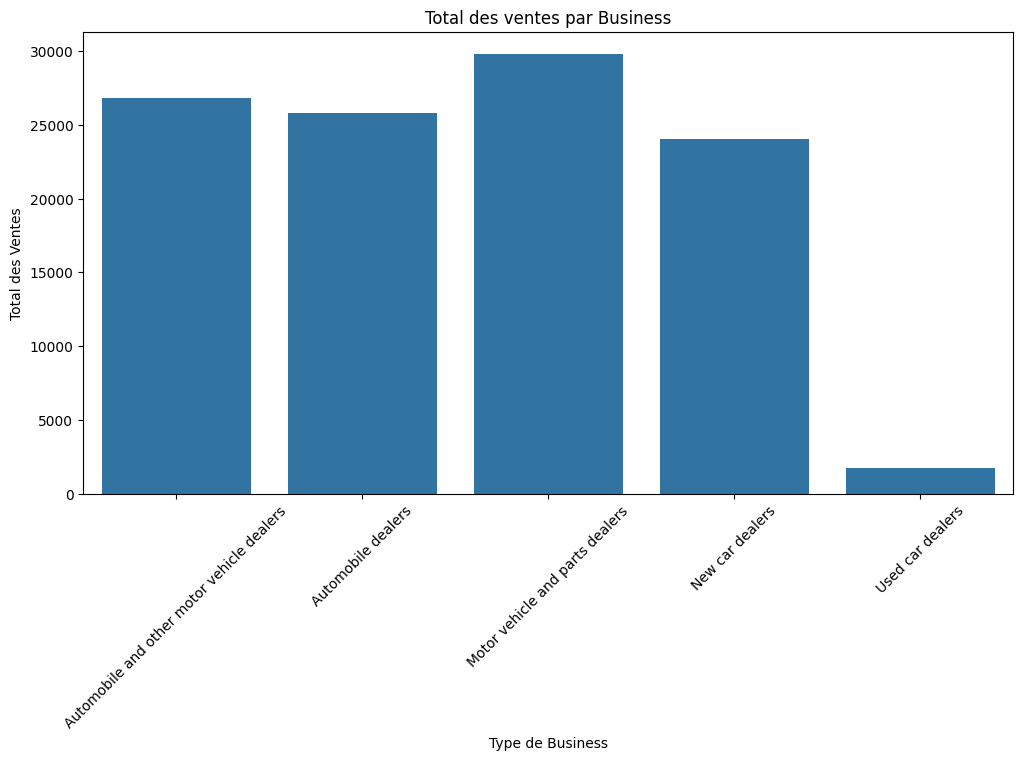

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

query_result = pd.read_sql('SELECT * FROM analytics.retail_sales LIMIT 5;', con=engine)
grouped = query_result.groupby("kind_of_business")["sales"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="kind_of_business", y="sales")

plt.title("Total des ventes par Business")
plt.xlabel("Type de Business")
plt.ylabel("Total des Ventes")
plt.xticks(rotation=45)  # Pour tourner les labels
plt.show()



### 4️⃣ Graphique de la tendance des ventes par mois 📊

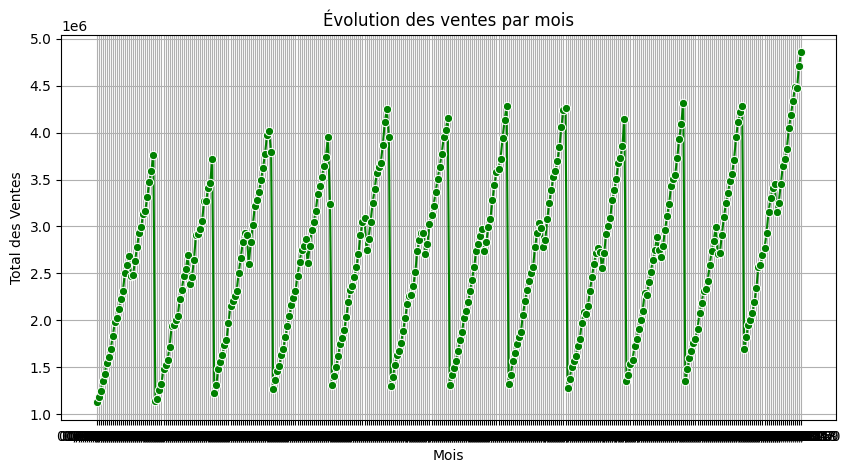

In [52]:
query_result = pd.read_sql('SELECT * FROM analytics.retail_sales;', con=engine)

grouped_month = query_result.groupby("sales_month")["sales"].sum().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_month, x="sales_month", y="sales", marker="o", color="green")

plt.title("Évolution des ventes par mois")
plt.xlabel("Mois")
plt.ylabel("Total des Ventes")
plt.grid(True)  # Pour afficher les lignes du fond
plt.show()

### 5️⃣ PieChart 🥧 🔥 (juste pour le style)

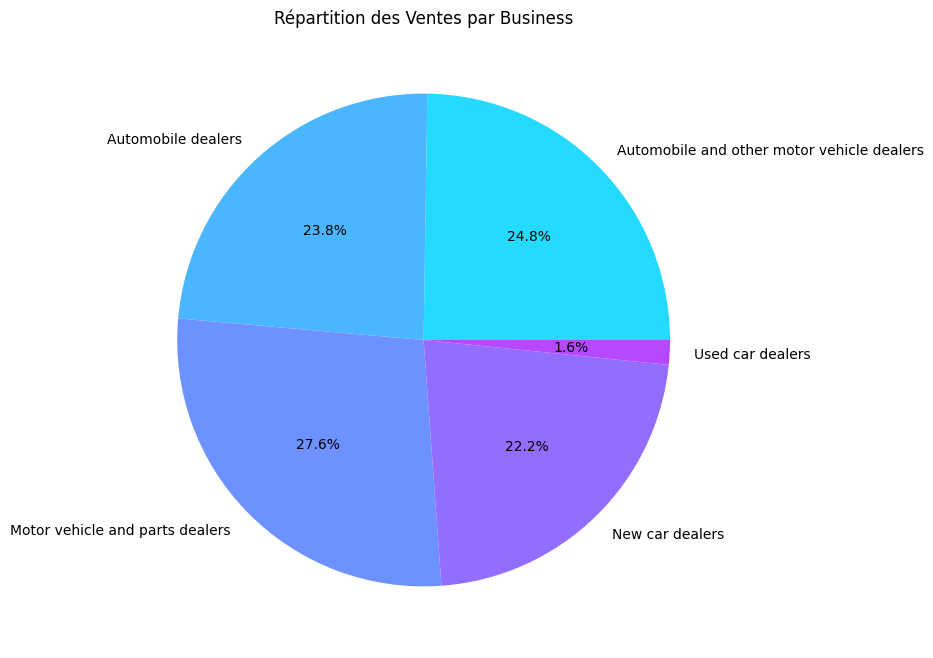

In [53]:
plt.figure(figsize=(8, 8))
plt.pie(grouped["sales"], labels=grouped["kind_of_business"], autopct="%1.1f%%", colors=sns.color_palette("cool"))
plt.title("Répartition des Ventes par Business")
plt.show()


C:\Users\awounfouet\AppData\Local\Temp\ipykernel_23312\2520755617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="kind_of_business", y="sales", palette="mako")


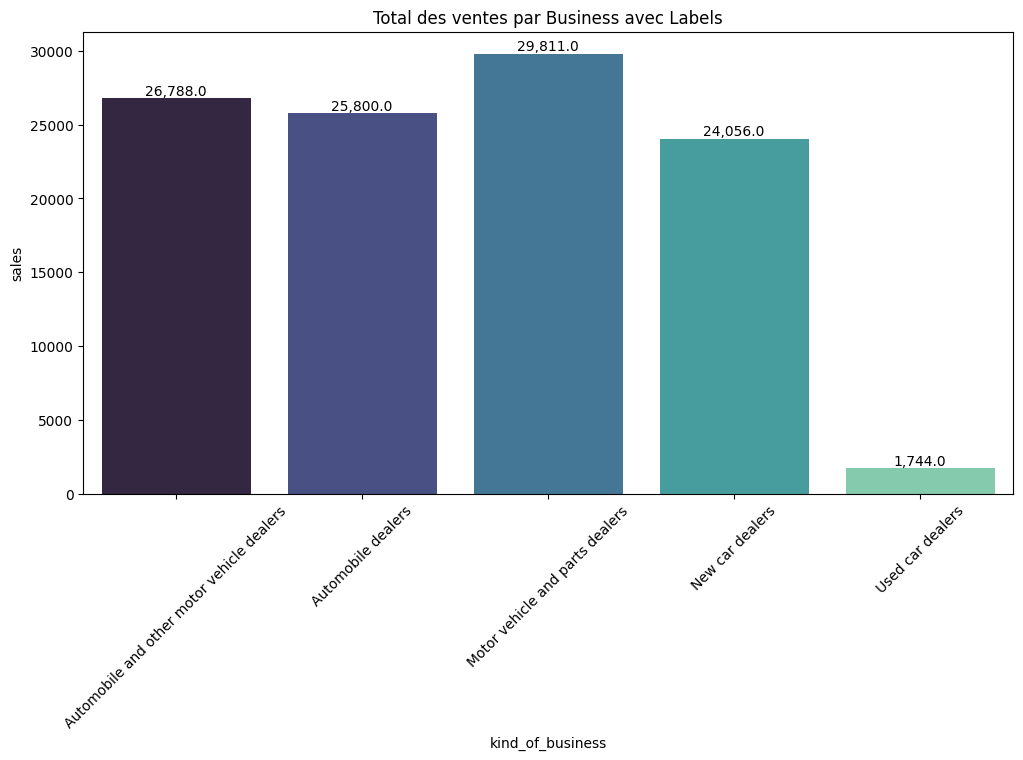

In [56]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="kind_of_business", y="sales", palette="mako")
#sns.barplot(data=grouped, x="kind_of_business", y="sales")


for index, row in grouped.iterrows():
    plt.text(index, row.sales, f"{row.sales:,}", ha='center', va='bottom')

plt.title("Total des ventes par Business avec Labels")
plt.xticks(rotation=45)
plt.show()


```sql
-- Trending the data
-- Simple trends

SELECT sales_month,sales
FROM retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
ORDER BY 1
;
--👉 Ici, ORDER BY 1 veut dire : Classe les résultats par la 1ère colonne de ton SELECT, c'est-à-dire sales_month.


SELECT date_part('year',sales_month) as sales_year
        ,sum(sales) as sales
FROM retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
GROUP BY 1
ORDER BY 1
;
```

In [42]:
query = """
SELECT sales_month, kind_of_business, sales
FROM analytics.retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
ORDER BY 1
"""

query_result = pd.read_sql(query, con=engine)
display(query_result.head())

,sales_month,kind_of_business,sales
0,01/01/1992,"Retail and food services sales, total",146376.0
1,01/01/1993,"Retail and food services sales, total",153221.0
2,01/01/1994,"Retail and food services sales, total",161349.0
3,01/01/1995,"Retail and food services sales, total",175344.0
4,01/01/1996,"Retail and food services sales, total",185019.0


In [57]:
query = """
SELECT 
    date_part('year', TO_DATE(sales_month, 'DD/MM/YYYY')) AS sales_year, 
    SUM(sales) AS total_sales
FROM 
    analytics.retail_sales
WHERE 
    sales_month ~ '^\d{2}/\d{2}/\d{4}$'  -- Ensure correct format
GROUP BY 
    sales_year;
"""

query_result = pd.read_sql(query, con=engine)
display(query_result.head())

,sales_year,total_sales
0,2005.0,32195696.0
1,2014.0,40813496.0
2,2006.0,33782252.0
3,2010.0,33809065.0
4,2001.0,26778981.0


```sql
-- Trending the data
-- Comparing components
SELECT date_part('year',sales_month) as sales_year
,kind_of_business
,sum(sales) as sales
FROM analytics.retail_sales
WHERE kind_of_business in ('Book stores','Sporting goods stores','Hobby, toy, and game stores')
GROUP BY 1,2
ORDER BY 1,2
;

SELECT sales_month
,kind_of_business
,sales
FROM analytics.retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
;

SELECT date_part('year',sales_month) as sales_year
,kind_of_business
,sum(sales) as sales
FROM analytics.retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
GROUP BY 1,2
;

SELECT date_part('year',sales_month) as sales_year
,sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales
,sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
FROM analytics.retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
GROUP BY 1
ORDER BY 1
;

SELECT sales_year
,womens_sales - mens_sales as womens_minus_mens
,mens_sales - womens_sales as mens_minus_womens
FROM
(
        SELECT date_part('year',sales_month) as sales_year
        ,sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales
        ,sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
        FROM analytics.retail_sales
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        and sales_month <= '2019-12-01'
        GROUP BY 1
) a
ORDER BY 1
;

SELECT date_part('year',sales_month) as sales_year
,sum(case when kind_of_business = 'Women''s clothing stores' then sales end) 
 - sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as womens_minus_mens
FROM analytics.retail_sales
WHERE kind_of_business in ('Men''s clothing stores'
 ,'Women''s clothing stores')
and sales_month <= '2019-12-01'
GROUP BY 1
ORDER BY 1
;

SELECT sales_year
,womens_sales / mens_sales as womens_times_of_mens
FROM
(
        SELECT date_part('year',sales_month) as sales_year
        ,sum(case when kind_of_business = 'Women''s clothing stores' then sales end) as womens_sales
        ,sum(case when kind_of_business = 'Men''s clothing stores' then sales end) as mens_sales
        FROM analytics.retail_sales
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        and sales_month <= '2019-12-01'
        GROUP BY 1
) a
ORDER BY 1
;

SELECT sales_year
,(womens_sales / mens_sales - 1) * 100 as womens_pct_of_mens
FROM
(
        SELECT date_part('year',sales_month) as sales_year
        ,sum(case when kind_of_business = 'Women''s clothing stores' 
                  then sales 
                  end) as womens_sales
        ,sum(case when kind_of_business = 'Men''s clothing stores' 
                  then sales 
                  end) as mens_sales
        FROM analytics.retail_sales
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        and sales_month <= '2019-12-01'
        GROUP BY 1
) a
ORDER BY 1
;

-- Percent of total calculations
SELECT sales_month
,kind_of_business
,sales * 100 / total_sales as pct_total_sales
FROM
(
        SELECT a.sales_month
        ,a.kind_of_business
        ,a.sales
        ,sum(b.sales) as total_sales
        FROM analytics.retail_sales a
        JOIN analytics.retail_sales b on a.sales_month = b.sales_month
        and b.kind_of_business in ('Men''s clothing stores'
         ,'Women''s clothing stores')
        WHERE a.kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        GROUP BY 1,2,3
) aa
ORDER BY 1,2
;

SELECT sales_month
,kind_of_business
,sales
,sum(sales) over (partition by sales_month) as total_sales
,sales * 100 / sum(sales) over (partition by sales_month) as pct_total
FROM analytics.retail_sales 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1
;

SELECT sales_month
,kind_of_business
,sales * 100 / yearly_sales as pct_yearly
FROM
(
        SELECT a.sales_month
        ,a.kind_of_business
        ,a.sales
        ,sum(b.sales) as yearly_sales
        FROM analytics.retail_sales a
        JOIN analytics.retail_sales b on date_part('year',a.sales_month) = date_part('year',b.sales_month)
        and a.kind_of_business = b.kind_of_business
        and b.kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        WHERE a.kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
        GROUP BY 1,2,3
) aa
ORDER BY 1,2
;

SELECT sales_month, kind_of_business, sales
,sum(sales) over (partition by date_part('year',sales_month), kind_of_business) as yearly_sales
,sales * 100 / sum(sales) over (partition by date_part('year',sales_month), kind_of_business) as pct_yearly
FROM analytics.retail_sales 
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
;

SELECT sales_year, sales
,first_value(sales) over (order by sales_year) as index_sales
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(sales) as sales
    FROM analytics.retail_sales
    WHERE kind_of_business = 'Women''s clothing stores'
    GROUP BY 1
) a
;

SELECT sales_year, sales
,(sales / index_sales - 1) * 100 as pct_from_index
FROM
(
        SELECT date_part('year',aa.sales_month) as sales_year
        ,bb.index_sales
        ,sum(aa.sales) as sales
        FROM analytics.retail_sales aa
        JOIN 
        (
                SELECT first_year, sum(a.sales) as index_sales
                FROM analytics.retail_sales a
                JOIN 
                (
                        SELECT min(date_part('year',sales_month)) as first_year
                        FROM analytics.retail_sales
                        WHERE kind_of_business = 'Women''s clothing stores'
                ) b on date_part('year',a.sales_month) = b.first_year 
                WHERE a.kind_of_business = 'Women''s clothing stores'
                GROUP BY 1
        ) bb on 1 = 1
        WHERE aa.kind_of_business = 'Women''s clothing stores'
        GROUP BY 1,2
) aaa
;

SELECT sales_year, kind_of_business, sales
,(sales / first_value(sales) over (partition by kind_of_business order by sales_year) - 1) * 100 as pct_from_index
FROM
(
        SELECT date_part('year',sales_month) as sales_year
        ,kind_of_business
        ,sum(sales) as sales
        FROM analytics.retail_sales
        WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')  and sales_month <= '2019-12-31'
GROUP BY 1,2
) a
;
```

In [29]:
query = """
SELECT 
    date_part('year', TO_DATE(sales_month, 'DD/MM/YYYY')) AS sales_year, 
    kind_of_business,
    SUM(sales) AS sales
FROM 
    analytics.retail_sales
WHERE 
    kind_of_business in ('Book stores','Sporting goods stores','Hobby, toy, and game stores')
GROUP BY 1,2
ORDER BY 1,2
;
"""

query_result = pd.read_sql(query, con=engine)
print("Shape : " ,query_result.shape)
display(query_result.head())

Shape :  (87, 3)


,sales_year,kind_of_business,sales
0,1992.0,Book stores,8327.0
1,1992.0,"Hobby, toy, and game stores",11251.0
2,1992.0,Sporting goods stores,15583.0
3,1993.0,Book stores,9108.0
4,1993.0,"Hobby, toy, and game stores",11651.0


In [58]:
query = """
SELECT sales_month,
    kind_of_business,
    sales
FROM analytics.retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2
;
"""

query_result = pd.read_sql(query, con=engine)
print("Shape : " ,query_result.shape)
display(query_result.head())

Shape :  (696, 3)


,sales_month,kind_of_business,sales
0,01/01/1992,Men's clothing stores,701.0
1,01/01/1992,Women's clothing stores,1873.0
2,01/01/1993,Men's clothing stores,695.0
3,01/01/1993,Women's clothing stores,2123.0
4,01/01/1994,Men's clothing stores,688.0


### Bonus 💪
Si tu veux avoir les 3 meilleures années par vente directement :

In [63]:
query = """
SELECT 
        date_part('year', TO_DATE(sales_month, 'DD/MM/YYYY')) AS sales_year, 
        sum(sales) as total_sales
FROM analytics.retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
GROUP BY sales_year
ORDER BY total_sales DESC
LIMIT 3
;
"""


query_result = pd.read_sql(query, con=engine)
print("Shape : " ,query_result.shape)
display(query_result.head())

Shape :  (3, 2)


,sales_year,total_sales
0,2020.0,6224399.0
1,2019.0,6218002.0
2,2018.0,6001623.0


```sql
------- Rolling time windows
-- Calculating rolling time windows
SELECT a.sales_month
,a.sales
,b.sales_month as rolling_sales_month
,b.sales as rolling_sales
FROM analytics.retail_sales a
JOIN analytics.retail_sales b on a.kind_of_business = b.kind_of_business 
 and b.sales_month between a.sales_month - interval '11 months' 
 and a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
and a.sales_month = '2019-12-01'
;

SELECT a.sales_month
,a.sales
,avg(b.sales) as moving_avg
,count(b.sales) as records_count
FROM analytics.retail_sales a
JOIN analytics.retail_sales b on a.kind_of_business = b.kind_of_business 
 and b.sales_month between a.sales_month - interval '11 months' 
 and a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
and a.sales_month >= '1993-01-01'
GROUP BY 1,2
ORDER BY 1
;

SELECT sales_month
,avg(sales) over (order by sales_month rows between 11 preceding and current row) as moving_avg
,count(sales) over (order by sales_month rows between 11 preceding and current row) as records_count
FROM analytics.retail_sales
WHERE kind_of_business = 'Women''s clothing stores'
;

-- Rolling time windows with sparse data
SELECT a.date, b.sales_month, b.sales
FROM date_dim a
JOIN 
(
        SELECT sales_month, sales
        FROM analytics.retail_sales 
        WHERE kind_of_business = 'Women''s clothing stores' 
        and date_part('month',sales_month) in (1,7) -- here we're artificially creating sparse data by limiting the months returned
) b on b.sales_month between a.date - interval '11 months' and a.date
WHERE a.date = a.first_day_of_month and a.date between '1993-01-01' and '2020-12-01'
ORDER BY 1,2
;

SELECT a.date
,avg(b.sales) as moving_avg
,count(b.sales) as records
FROM date_dim a
JOIN 
(
        SELECT sales_month, sales
        FROM analytics.retail_sales 
        WHERE kind_of_business = 'Women''s clothing stores' and date_part('month',sales_month) in (1,7)
) b on b.sales_month between a.date - interval '11 months' and a.date
WHERE a.date = a.first_day_of_month and a.date between '1993-01-01' and '2020-12-01'
GROUP BY 1
ORDER BY 1
;

SELECT a.sales_month
,avg(b.sales) as moving_avg
FROM
(
        SELECT distinct sales_month
        FROM analytics.retail_sales
        WHERE sales_month between '1993-01-01' and '2020-12-01'
) a
JOIN analytics.retail_sales b on b.sales_month between a.sales_month - interval '11 months' and a.sales_month
and b.kind_of_business = 'Women''s clothing stores' 
GROUP BY 1
;

-- Calculating cumulative values
SELECT sales_month
,sales
,sum(sales) over (partition by date_part('year',sales_month) order by sales_month) as sales_ytd
FROM analytics.retail_sales
WHERE kind_of_business = 'Women''s clothing stores'
;

SELECT a.sales_month, a.sales
,sum(b.sales) as sales_ytd
FROM analytics.retail_sales a
JOIN analytics.retail_sales b on date_part('year',a.sales_month) = date_part('year',b.sales_month)
 and b.sales_month <= a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
GROUP BY 1,2
;
```

```sql
------- Analyzing with seasonality
-- Period over period comparisons
SELECT kind_of_business, sales_month, sales
,lag(sales_month) over (partition by kind_of_business order by sales_month) as prev_month
,lag(sales) over (partition by kind_of_business order by sales_month) as prev_month_sales
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT kind_of_business, sales_month, sales
,(sales / lag(sales) over (partition by kind_of_business order by sales_month) - 1) * 100 as pct_growth_from_previous
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT sales_year, yearly_sales
,lag(yearly_sales) over (order by sales_year) as prev_year_sales
,(yearly_sales / lag(yearly_sales) over (order by sales_year) -1) * 100 as pct_growth_from_previous
FROM
(
        SELECT date_part('year',sales_month) as sales_year
        ,sum(sales) as yearly_sales
        FROM analytics.retail_sales
        WHERE kind_of_business = 'Book stores'
        GROUP BY 1
) a
;

-- Period over period comparisons - Same month vs. last year
SELECT sales_month
,date_part('month',sales_month)
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT sales_month
,sales
,lag(sales_month) over (partition by date_part('month',sales_month) order by sales_month) as prev_year_month
,lag(sales) over (partition by date_part('month',sales_month) order by sales_month) as prev_year_sales
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT sales_month, sales
,sales - lag(sales) over (partition by date_part('month',sales_month) order by sales_month) as absolute_diff
,(sales / lag(sales) over (partition by date_part('month',sales_month) order by sales_month) - 1) * 100 as pct_diff
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT date_part('month',sales_month) as month_number
,to_char(sales_month,'Month') as month_name
,max(case when date_part('year',sales_month) = 1992 then sales end) as sales_1992
,max(case when date_part('year',sales_month) = 1993 then sales end) as sales_1993
,max(case when date_part('year',sales_month) = 1994 then sales end) as sales_1994
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores' and sales_month between '1992-01-01' and '1994-12-01'
GROUP BY 1,2
;

-- Comparing to multiple prior periods
SELECT sales_month, sales
,lag(sales,1) over (partition by date_part('month',sales_month) order by sales_month) as prev_sales_1
,lag(sales,2) over (partition by date_part('month',sales_month) order by sales_month) as prev_sales_2
,lag(sales,3) over (partition by date_part('month',sales_month) order by sales_month) as prev_sales_3
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
;

SELECT sales_month, sales
,sales / avg(sales) over (partition by date_part('month',sales_month) order by sales_month rows between 3 preceding and 1 preceding) as pct_of_prev_3
FROM analytics.retail_sales
WHERE kind_of_business = 'Book stores'
```